In [16]:
#==============================
# Goal
#==============================
H = [(1, "XX"), (1, "YY"), (1, "ZZ")]
print(H)

[(1, 'XX'), (1, 'YY'), (1, 'ZZ')]


In [17]:
# Alternatively
from qiskit.quantum_info import SparsePauliOp
 
H = SparsePauliOp(["XX", "YY", "ZZ"], coeffs=[1.0 + 0.0j, 1.0 + 0.0j, 1.0 + 0.0j])
print(H)

SparsePauliOp(['XX', 'YY', 'ZZ'],
              coeffs=[1.+0.j, 1.+0.j, 1.+0.j])


# Ansatz

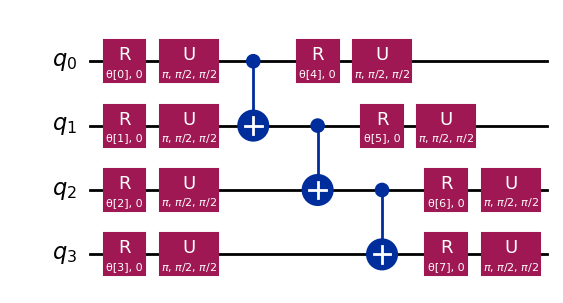

In [33]:
from qiskit.circuit.library import efficient_su2
SU2_ansatz_linear = efficient_su2(4, su2_gates=['rx','y'], entanglement='linear', reps=1)
SU2_ansatz_linear.decompose().draw(output='mpl')

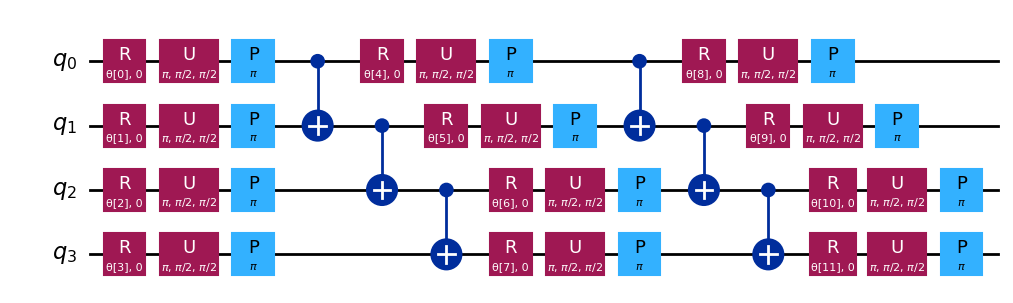

In [34]:
# Adding layer of entanglement
SU2_ansatz_linear_2 = efficient_su2(4, su2_gates=['rx','y','z'], entanglement='linear', reps=2)
SU2_ansatz_linear_2.decompose().draw(output='mpl')

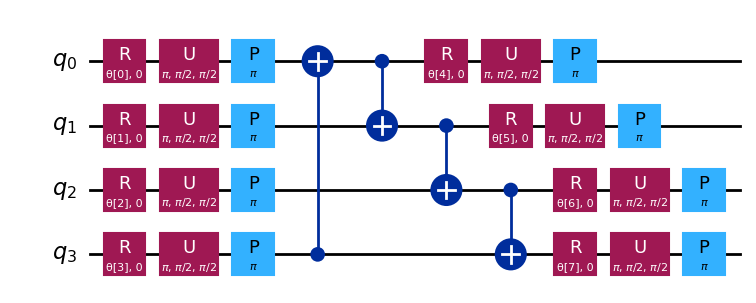

In [35]:
# Other entanglement schemes
SU2_ansatz_circ = efficient_su2(4, su2_gates=['rx','y','z'], entanglement='circular', reps=1)
SU2_ansatz_circ.decompose().draw(output='mpl')


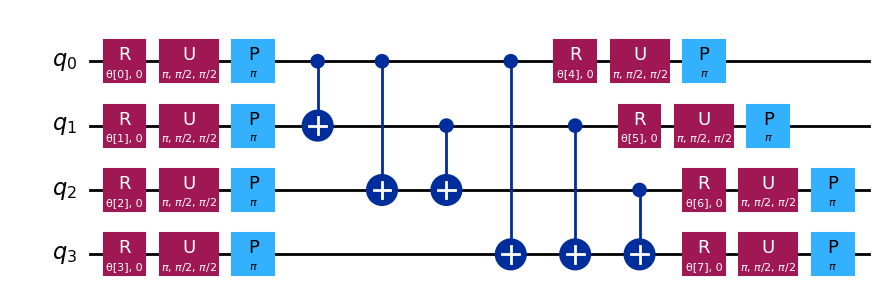

In [36]:

SU2_ansatz_full = efficient_su2(4, su2_gates=['rx','y','z'], entanglement='full', reps=1)
SU2_ansatz_full.decompose().draw(output='mpl')

In [37]:
ansatzs = [SU2_ansatz_linear,SU2_ansatz_linear_2,SU2_ansatz_circ,SU2_ansatz_full]
depth = [0,0,0,0]
for i in range(len(ansatzs)):
    depth[i] = ansatzs[i].decompose().depth()

print(depth)

[7, 14, 10, 11]


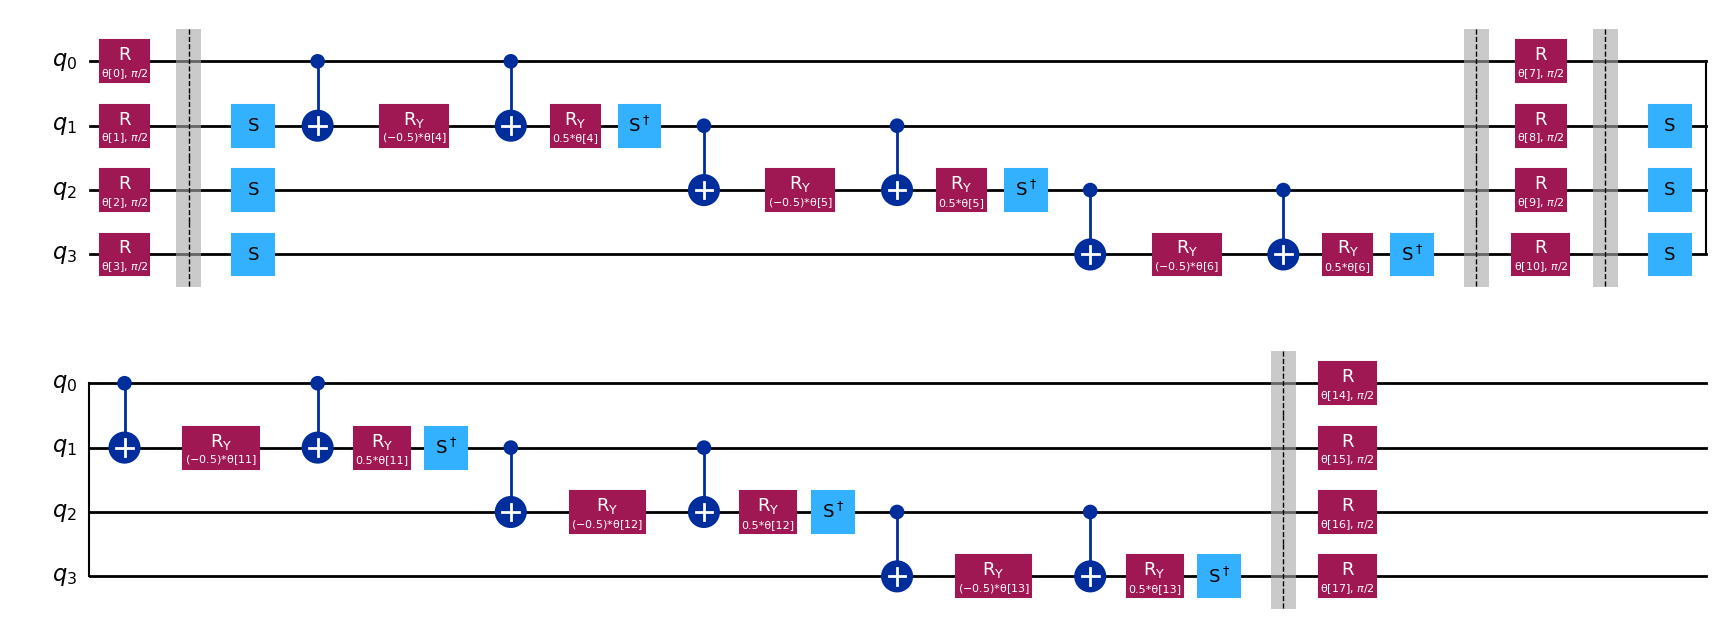

In [38]:
from qiskit.circuit.library import n_local
 
rotation_blocks = ["ry"]
entanglement_blocks = ["crx"]
two_ansatz = n_local( 4, rotation_blocks, entanglement_blocks, "linear", insert_barriers=True, reps=2 )
two_ansatz.decompose().draw(output="mpl")

8


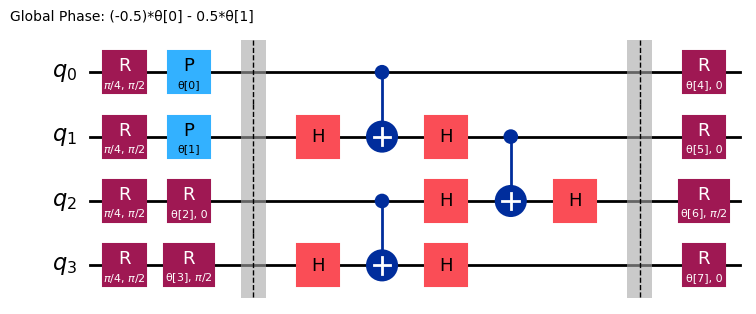

In [52]:
from qiskit.circuit.library import pauli_two_design
 
PtwoD_ansatz = pauli_two_design(4, reps=1, seed=100, insert_barriers=True)
print(PtwoD_ansatz.decompose().depth())
PtwoD_ansatz.decompose().draw(output="mpl")

11


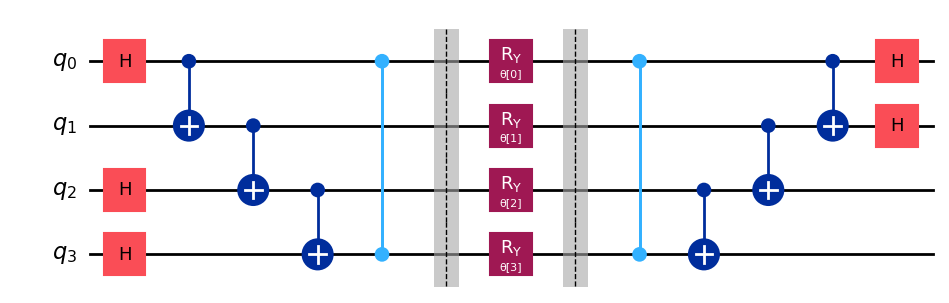

In [60]:
from qiskit import QuantumCircuit
from qiskit.circuit import ParameterVector
 
n = 4
 
theta = ParameterVector("θ", length=n)
qc = QuantumCircuit(n)
qc.h(0)
qc.h(2)
qc.h(3)
for i in range(n - 1):
    qc.cx(i, i + 1)
qc.cz(0, n - 1)
qc.barrier()
for i in range(n):
    qc.ry(theta[i], i)
qc.barrier()
qc.cz(0, n - 1)
for i in reversed(range(n - 1)):
    qc.cx(i, i + 1)
qc.h(0)
qc.h(1)

own_ansatz = qc
print(own_ansatz.depth())
qc.draw("mpl")